<a href="https://colab.research.google.com/github/Sahil01S/UK_Smoking_Analysis/blob/main/Smoking_UK_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

smokes <- read.csv("smoking.csv")
str(smokes)



'data.frame':	1691 obs. of  13 variables:
 $ X                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender               : chr  "Male" "Female" "Male" "Female" ...
 $ age                  : int  38 42 40 40 39 37 53 44 40 41 ...
 $ marital_status       : chr  "Divorced" "Single" "Married" "Married" ...
 $ highest_qualification: chr  "No Qualification" "No Qualification" "Degree" "Degree" ...
 $ nationality          : chr  "British" "British" "English" "English" ...
 $ ethnicity            : chr  "White" "White" "White" "White" ...
 $ gross_income         : chr  "2,600 to 5,200" "Under 2,600" "28,600 to 36,400" "10,400 to 15,600" ...
 $ region               : chr  "The North" "The North" "The North" "The North" ...
 $ smoke                : chr  "No" "Yes" "No" "No" ...
 $ amt_weekends         : int  NA 12 NA NA NA NA 6 NA 8 15 ...
 $ amt_weekdays         : int  NA 12 NA NA NA NA 6 NA 8 12 ...
 $ type                 : chr  "" "Packets" "" "" ...


In [ ]:
dim(smokes)

[1] 1691   13

In [ ]:
colSums(is.na(smokes))

X                gender                   age 
                    0                     0                     0 
       marital_status highest_qualification           nationality 
                    0                     0                     0 
            ethnicity          gross_income                region 
                    0                     0                     0 
                smoke          amt_weekends          amt_weekdays 
                    0                  1270                  1270 
                 type 
                    0

In [ ]:

missing_cols <- colnames(smokes)[colSums(is.na(smokes)) > 0]
for (col in missing_cols) {
  if (is.numeric(smokes[[col]])) {
    smokes[[col]][is.na(smokes[[col]])] <- 0
  }
}


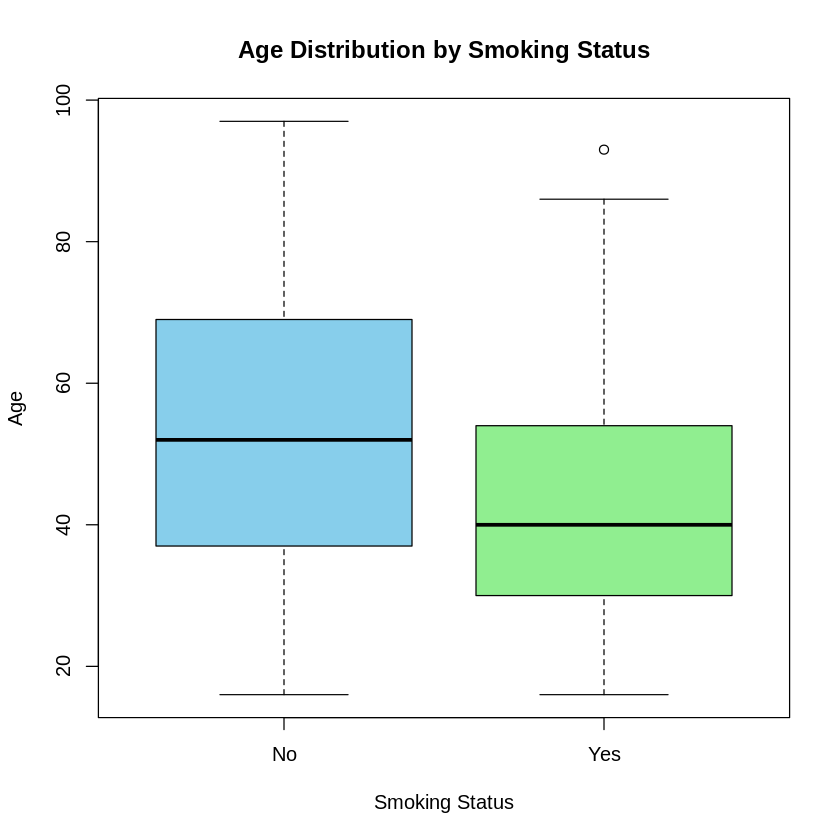

In [ ]:
# Plot age distribution by smoking status
boxplot(age ~ smoke, data = smokes,
main = "Age Distribution by Smoking Status", xlab = "Smoking Status",
ylab = "Age", col = c("skyblue", "lightgreen"))


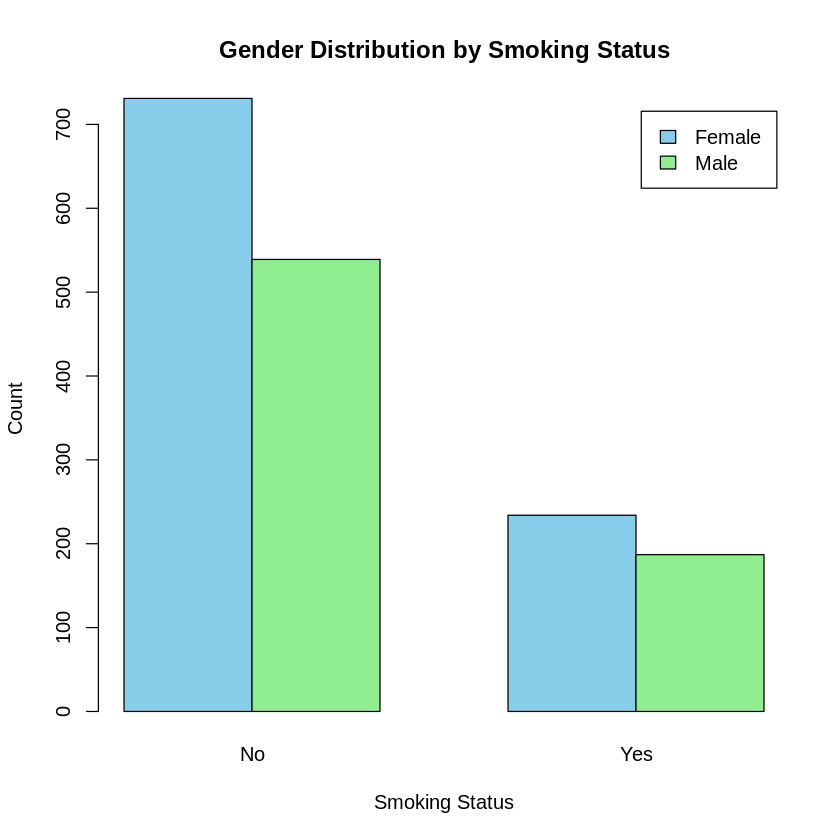

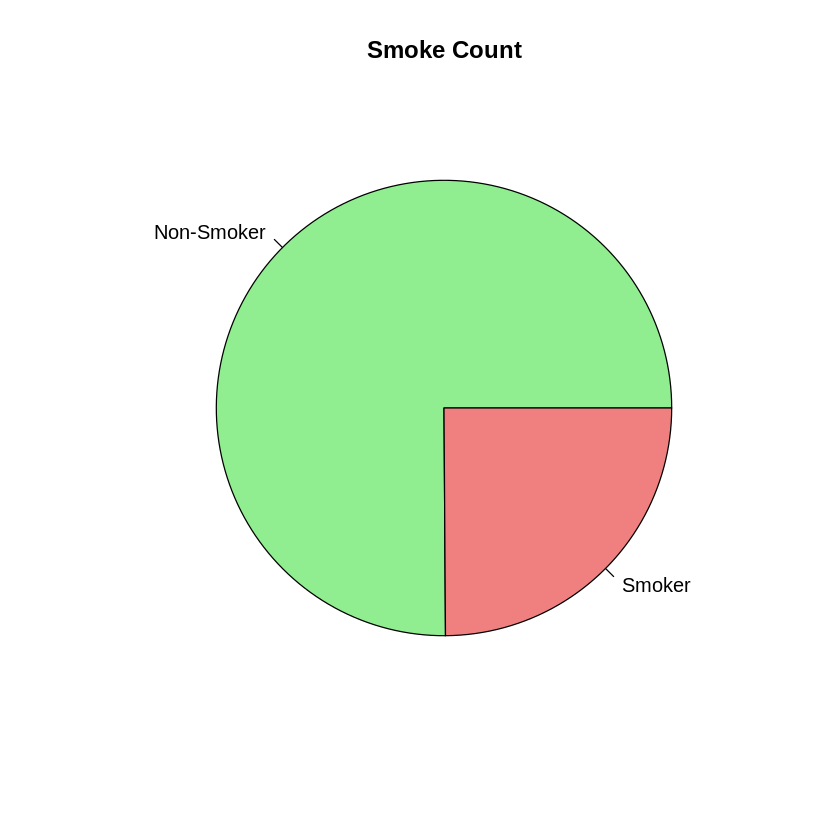

In [ ]:
# Plot gender distribution by smoking status
barplot(table(smokes$gender, smokes$smoke), beside = TRUE, legend = TRUE, col = c("skyblue", "lightgreen"), main = "Gender Distribution by Smoking Status", xlab = "Smoking Status", ylab = "Count")

pie(table(smokes$smoke), main = "Smoke Count", col = c("lightgreen", "lightcoral"), labels = c("Non-Smoker", "Smoker"))




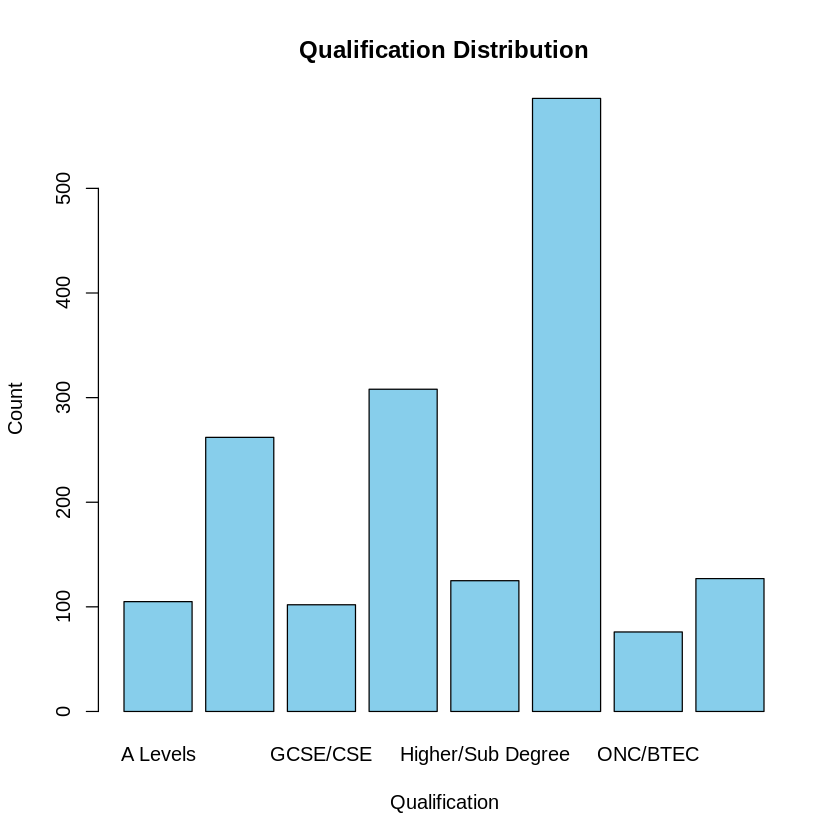

In [ ]:


# Histogram of qualification counts
barplot(table(smokes$highest_qualification), col = "skyblue", main = "Qualification Distribution", xlab = "Qualification", ylab = "Count")



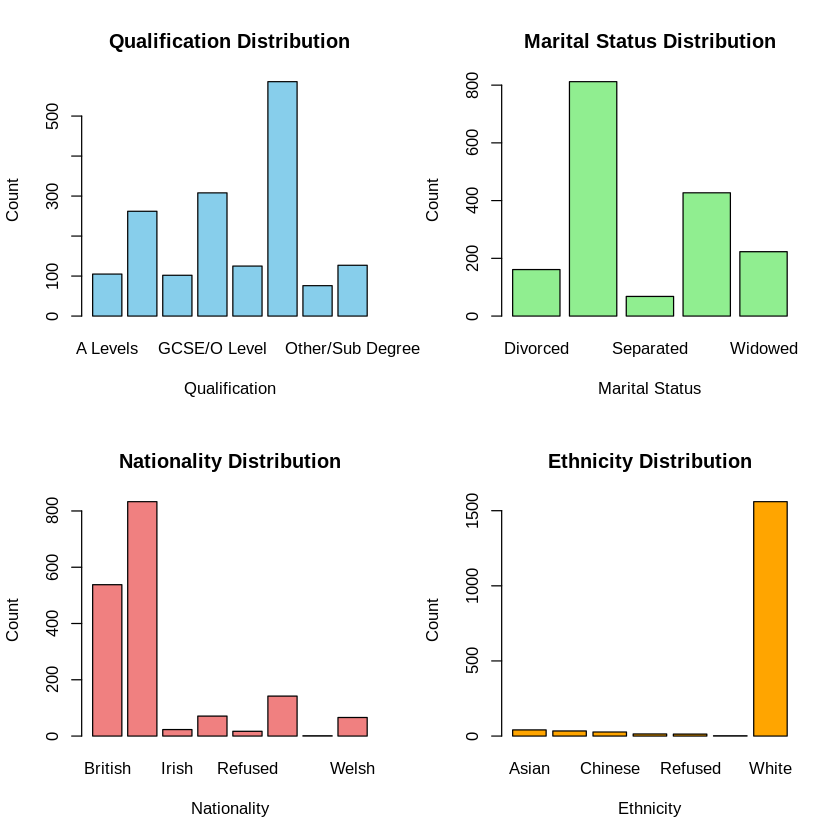

In [ ]:

par(mfrow=c(2,2))

# Histogram of qualification counts
barplot(table(smokes$highest_qualification), col = "skyblue", main = "Qualification Distribution", xlab = "Qualification", ylab = "Count")

# Histogram of marital status counts
barplot(table(smokes$marital_status), col = "lightgreen", main = "Marital Status Distribution", xlab = "Marital Status", ylab = "Count")

# Histogram of nationality counts
barplot(table(smokes$nationality), col = "lightcoral", main = "Nationality Distribution", xlab = "Nationality", ylab = "Count")

# Histogram of ethnicity counts
barplot(table(smokes$ethnicity), col = "orange", main = "Ethnicity Distribution", xlab = "Ethnicity", ylab = "Count")

par(mfrow = c(1,1))


In [ ]:

# Example of comparing smokers and non-smokers across age groups
age_groups <- cut(smokes$age, breaks = c(0, 30, 40, 50, 60, 100))
# Create table of counts
smoke_age_counts <- table(age_groups, smokes$smoke)



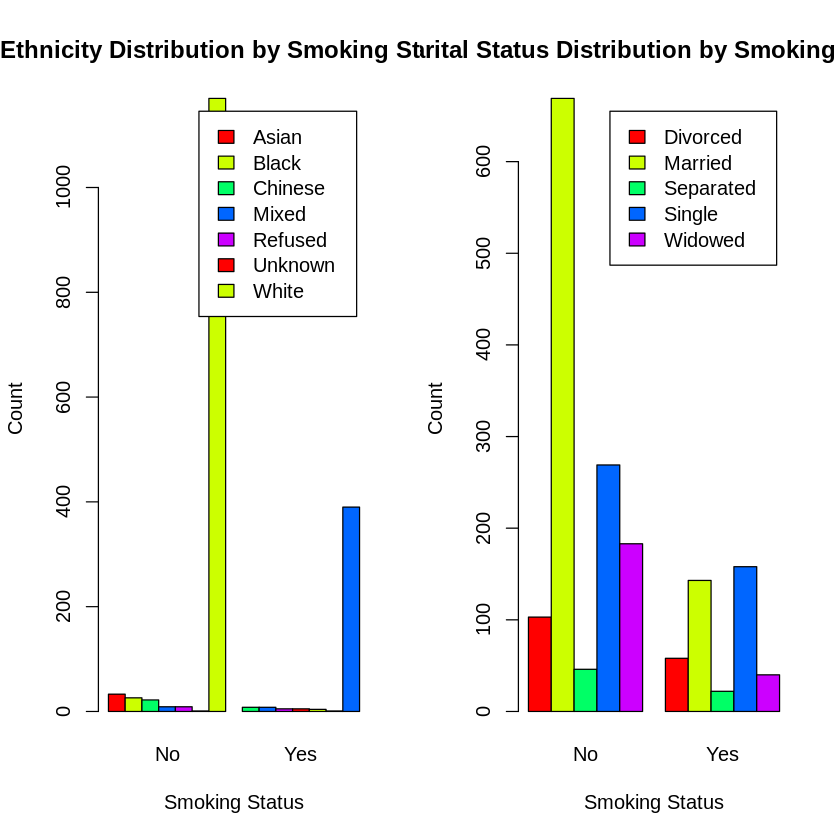

In [ ]:
par(mfrow=c(1,2))

barplot(table(smokes$ethnicity, smokes$smoke), beside = TRUE, legend = TRUE, col = rainbow(5),
        main = "Ethnicity Distribution by Smoking Status", xlab = "Smoking Status", ylab = "Count")


barplot(table(smokes$marital_status, smokes$smoke), beside = TRUE, legend = TRUE, col = rainbow(5),
        main = "Marital Status Distribution by Smoking Status", xlab = "Smoking Status", ylab = "Count")

par(mfrow=c(1,1))


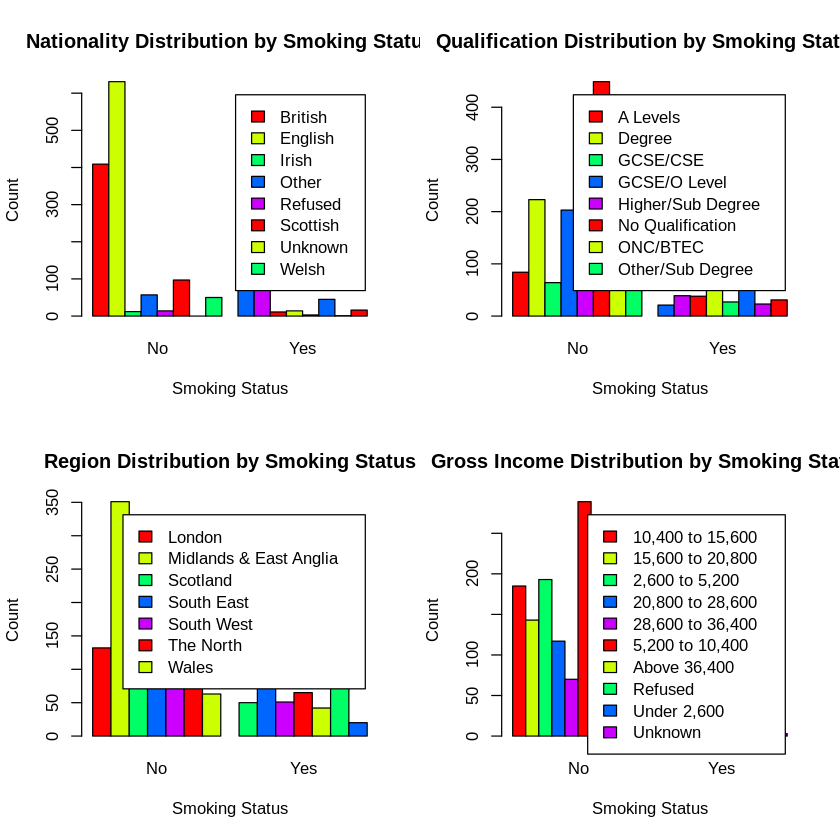

In [ ]:
par(mfrow=c(2,2))

barplot(table(smokes$nationality, smokes$smoke), beside = TRUE, legend = TRUE, col = rainbow(5),
        main = "Nationality Distribution by Smoking Status", xlab = "Smoking Status", ylab = "Count")


barplot(table(smokes$highest_qualification, smokes$smoke), beside = TRUE, legend = TRUE, col = rainbow(5),
        main = "Qualification Distribution by Smoking Status", xlab = "Smoking Status", ylab = "Count")


barplot(table(smokes$region, smokes$smoke), beside = TRUE, legend = TRUE, col = rainbow(5),
        main = "Region Distribution by Smoking Status", xlab = "Smoking Status", ylab = "Count")

barplot(table(smokes$gross_income, smokes$smoke), beside = TRUE, legend = TRUE, col = rainbow(5),
        main = "Gross Income Distribution by Smoking Status", xlab = "Smoking Status", ylab = "Count")

par(mfrow=c(1,1))



In [ ]:


# Chi-square test for gender
table_gender <- table(smokes$smoke, smokes$gender)
chi_gender <- chisq.test(table_gender)
print(chi_gender)

# Chi-square test for marital status
table_marital <- table(smokes$smoke, smokes$marital_status)
chi_marital <- chisq.test(table_marital)
print(chi_marital)

# Chi-square test for highest qualification
table_qualification <- table(smokes$smoke, smokes$highest_qualification)
chi_qualification <- chisq.test(table_qualification)
print(chi_qualification)

# Chi-square test for region
table_region <- table(smokes$smoke, smokes$region)
chi_region <- chisq.test(table_region)
print(chi_region)

# Chi-square test for Ethnicity
table_ethnicity <- table(smokes$smoke, smokes$ethnicity)
chi_ethnicity <- chisq.test(table_ethnicity)
print(chi_ethnicity)

# Example for Gross Income
table_income <- table(smokes$smoke, smokes$gross_income)
chi_income <- chisq.test(table_income)
print(chi_income)

# ANOVA for amt_weekends by marital_status
anova_weekends_marital <- aov(amt_weekends ~ marital_status, data = smokes)
summary(anova_weekends_marital)

# ANOVA for amt_weekends by highest_qualification
anova_weekends_qualification <- aov(amt_weekends ~ highest_qualification, data = smokes)
summary(anova_weekends_qualification)

# ANOVA for amt_weekends by region
anova_weekends_region <- aov(amt_weekends ~ region, data = smokes)
summary(anova_weekends_region)

# ANOVA for amt_weekdays by marital_status
anova_weekdays_marital <- aov(amt_weekdays ~ marital_status, data = smokes)
summary(anova_weekdays_marital)

# ANOVA for amt_weekdays by highest_qualification
anova_weekdays_qualification <- aov(amt_weekdays ~ highest_qualification, data = smokes)
summary(anova_weekdays_qualification)


# ANOVA for amt_weekdays by region
anova_weekdays_region <- aov(amt_weekdays ~ region, data = smokes)
summary(anova_weekdays_region)




	Pearson's Chi-squared test with Yates' continuity correction

data:  table_gender
X-squared = 0.42699, df = 1, p-value = 0.5135


	Pearson's Chi-squared test

data:  table_marital
X-squared = 74.98, df = 4, p-value = 2.012e-15


	Pearson's Chi-squared test

data:  table_qualification
X-squared = 40.281, df = 7, p-value = 1.112e-06


	Pearson's Chi-squared test

data:  table_region
X-squared = 12.671, df = 6, p-value = 0.04857



Warning message in chisq.test(table_ethnicity):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table_ethnicity
X-squared = 3.0561, df = 6, p-value = 0.8018



Warning message in chisq.test(table_income):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table_income
X-squared = 19.835, df = 9, p-value = 0.01896



                 Df Sum Sq Mean Sq F value   Pr(>F)    
marital_status    4   3941   985.2   13.58 6.73e-11 ***
Residuals      1686 122320    72.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                        Df Sum Sq Mean Sq F value   Pr(>F)    
highest_qualification    7   2869   409.9   5.591 2.19e-06 ***
Residuals             1683 123391    73.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              Df Sum Sq Mean Sq F value Pr(>F)  
region         6   1224  203.98   2.747 0.0117 *
Residuals   1684 125037   74.25                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value   Pr(>F)    
marital_status    4   1909   477.4   8.482 8.96e-07 ***
Residuals      1686  94893    56.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                        Df Sum Sq Mean Sq F value  Pr(>F)   
highest_qualification    7   1354  193.45   3.411 0.00126 **
Residuals             1683  95449   56.71                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              Df Sum Sq Mean Sq F value Pr(>F)  
region         6    929  154.87    2.72 0.0124 *
Residuals   1684  95874   56.93                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In summary, your chi-squared tests and ANOVA indicate that marital status, highest qualification, and region have significant associations or effects on the variables you are testing. Ethnicity and gender do not show significant associations

In [ ]:

smokes$smoke <- ifelse(smokes$smoke =="Yes", 1, 0)

smokes$gender <- as.factor(smokes$gender)
smokes$marital_status <- as.factor(smokes$marital_status)
smokes$highest_qualification <- as.factor(smokes$highest_qualification)
smokes$nationality <- as.factor(smokes$nationality)
smokes$ethnicity <- as.factor(smokes$ethnicity)
smokes$gross_income <- as.factor(smokes$gross_income)
smokes$region <- as.factor(smokes$region)
smokes$smoke <- as.factor(smokes$smoke)
smokes$type <- as.factor(smokes$type)

# Verify the data types
str(smokes)


'data.frame':	1691 obs. of  13 variables:
 $ X                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender               : Factor w/ 2 levels "Female","Male": 2 1 2 1 1 1 2 2 2 1 ...
 $ age                  : int  38 42 40 40 39 37 53 44 40 41 ...
 $ marital_status       : Factor w/ 5 levels "Divorced","Married",..: 1 4 2 2 2 2 2 4 4 2 ...
 $ highest_qualification: Factor w/ 8 levels "A Levels","Degree",..: 6 6 2 2 4 4 2 2 3 6 ...
 $ nationality          : Factor w/ 8 levels "British","English",..: 1 1 2 2 1 1 1 2 2 2 ...
 $ ethnicity            : Factor w/ 7 levels "Asian","Black",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ gross_income         : Factor w/ 10 levels "10,400 to 15,600",..: 3 9 5 1 3 2 7 1 3 6 ...
 $ region               : Factor w/ 7 levels "London","Midlands & East Anglia",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ smoke                : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 2 1 2 2 ...
 $ amt_weekends         : num  0 12 0 0 0 0 6 0 8 15 ...
 $ amt_weekdays         : num  0 12 0 0 0 0 6 0

In [ ]:

set.seed(123)  # For reproducibility
train_index <- sample(1:nrow(smokes), 0.8 * nrow(smokes))
train_data <- smokes[train_index, ]
test_data <- smokes[-train_index, ]



# Logistic regression
logistic_model <- glm(smoke ~ . - X - type - amt_weekdays - amt_weekends, data = train_data, family = binomial)

# Summary of the logistic model
summary(logistic_model)





Call:
glm(formula = smoke ~ . - X - type - amt_weekdays - amt_weekends, 
    family = binomial, data = train_data)

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                             2.232e-01  6.484e-01   0.344  0.73072
genderMale                              2.454e-01  1.505e-01   1.630  0.10300
age                                    -3.596e-02  5.619e-03  -6.400 1.55e-10
marital_statusMarried                  -9.156e-01  2.268e-01  -4.036 5.43e-05
marital_statusSeparated                -3.528e-01  3.619e-01  -0.975  0.32957
marital_statusSingle                   -4.346e-01  2.553e-01  -1.702  0.08868
marital_statusWidowed                  -1.971e-01  2.980e-01  -0.662  0.50821
highest_qualificationDegree             1.194e-01  3.741e-01   0.319  0.74966
highest_qualificationGCSE/CSE           1.027e+00  3.942e-01   2.605  0.00920
highest_qualificationGCSE/O Level       9.498e-01  3.411e-01   2.785  0.00536
highest_qua

In [ ]:
install.packages("caret")
# Predict on test data
logistic_predictions <- predict(logistic_model, newdata = test_data, type = "response")

# Convert probabilities to class labels (0 or 1)
logistic_class <- ifelse(logistic_predictions > 0.5, 1, 0)

library(caret)
# Evaluate the model
conf_matrix <- table(Predicted = logistic_class, Actual = test_data$smoke)
confusionMatrix(conf_matrix)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



Confusion Matrix and Statistics

         Actual
Predicted   0   1
        0 236  72
        1  18  13
                                          
               Accuracy : 0.7345          
                 95% CI : (0.6841, 0.7808)
    No Information Rate : 0.7493          
    P-Value [Acc > NIR] : 0.7563          
                                          
                  Kappa : 0.1041          
                                          
 Mcnemar's Test P-Value : 2.314e-08       
                                          
            Sensitivity : 0.9291          
            Specificity : 0.1529          
         Pos Pred Value : 0.7662          
         Neg Pred Value : 0.4194          
             Prevalence : 0.7493          
         Detection Rate : 0.6962          
   Detection Prevalence : 0.9086          
      Balanced Accuracy : 0.5410          
                                          
       'Positive' Class : 0               
                                     

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




AUC: 0.6771885 


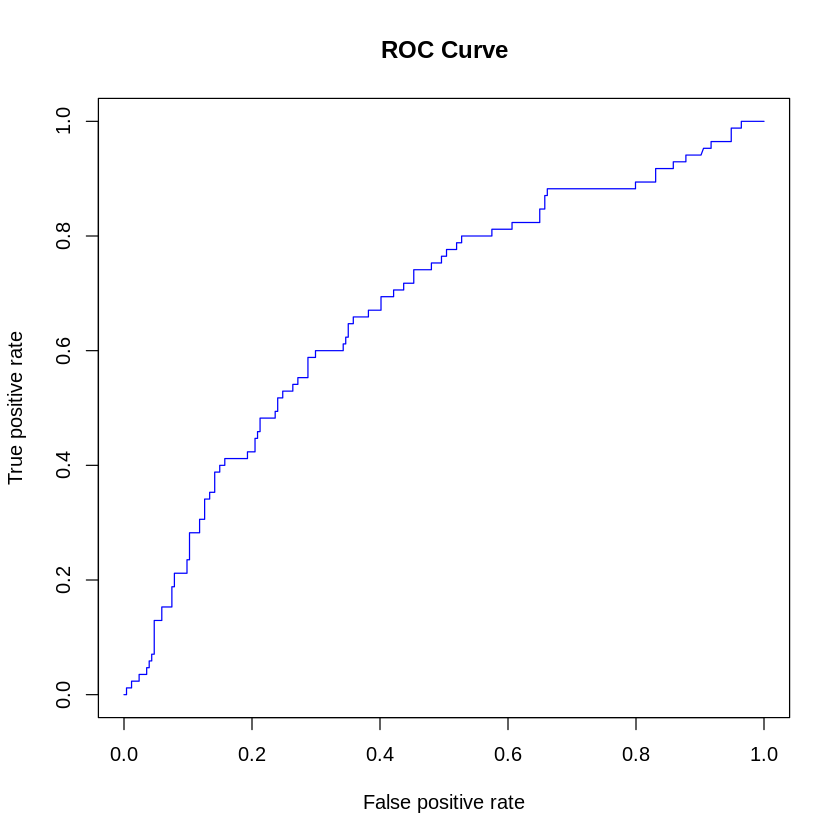

In [ ]:
install.packages("ROCR")
# Calculate other metrics
library(ROCR)
pred <- prediction(logistic_predictions, test_data$smoke)
perf <- performance(pred, "tpr", "fpr")
plot(perf, col = "blue", main = "ROC Curve")
auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]
cat("AUC:", auc, "\n")



We can se prediction accuracy is good. Still we try apply variable selection to get more accuracy.

In [ ]:

# Fit a full model with all predictors
full_model <- glm(smoke ~ . - X - type - amt_weekdays - amt_weekends, data = train_data, family = binomial)

# Perform stepwise selection
stepwise_model <- step(full_model, direction = "both")

# Summary of the stepwise model
summary(stepwise_model)



Start:  AIC=1421.22
smoke ~ (X + gender + age + marital_status + highest_qualification + 
    nationality + ethnicity + gross_income + region + amt_weekends + 
    amt_weekdays + type) - X - type - amt_weekdays - amt_weekends

                        Df Deviance    AIC
- gross_income           9   1347.9 1413.9
- ethnicity              6   1346.6 1418.6
- region                 6   1346.6 1418.6
<none>                       1337.2 1421.2
- gender                 1   1339.9 1421.9
- nationality            7   1353.1 1423.1
- highest_qualification  7   1360.6 1430.6
- marital_status         4   1360.0 1436.0
- age                    1   1381.5 1463.5

Step:  AIC=1413.91
smoke ~ gender + age + marital_status + highest_qualification + 
    nationality + ethnicity + region

                        Df Deviance    AIC
- ethnicity              6   1356.7 1410.7
- region                 6   1357.0 1411.0
- gender                 1   1349.2 1413.2
<none>                       1347.9 1413.9
- nat


Call:
glm(formula = smoke ~ age + marital_status + highest_qualification + 
    nationality, family = binomial, data = train_data)

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                              0.246073   0.422611   0.582  0.56039
age                                     -0.033911   0.005418  -6.259 3.88e-10
marital_statusMarried                   -0.971195   0.218132  -4.452 8.49e-06
marital_statusSeparated                 -0.411321   0.354664  -1.160  0.24615
marital_statusSingle                    -0.395646   0.242294  -1.633  0.10249
marital_statusWidowed                   -0.287689   0.291320  -0.988  0.32338
highest_qualificationDegree             -0.038090   0.352713  -0.108  0.91400
highest_qualificationGCSE/CSE            1.013040   0.378687   2.675  0.00747
highest_qualificationGCSE/O Level        0.907122   0.326597   2.777  0.00548
highest_qualificationHigher/Sub Degree   0.647346   0.385675   1.678  0.0

In [ ]:

# Predict on test data using the stepwise model
stepwise_predictions <- predict(stepwise_model, newdata = test_data, type = "response")

# Convert probabilities to class labels (0 or 1)
stepwise_class <- ifelse(stepwise_predictions > 0.5, 1, 0)

# Evaluate the stepwise model
conf_matrix_results_stepwise <- confusionMatrix(as.factor(stepwise_class), as.factor(test_data$smoke))

# Print confusion matrix and metrics for stepwise model
print(conf_matrix_results_stepwise)


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 239  70
         1  15  15
                                          
               Accuracy : 0.7493          
                 95% CI : (0.6996, 0.7945)
    No Information Rate : 0.7493          
    P-Value [Acc > NIR] : 0.5291          
                                          
                  Kappa : 0.1496          
                                          
 Mcnemar's Test P-Value : 4.71e-09        
                                          
            Sensitivity : 0.9409          
            Specificity : 0.1765          
         Pos Pred Value : 0.7735          
         Neg Pred Value : 0.5000          
             Prevalence : 0.7493          
         Detection Rate : 0.7050          
   Detection Prevalence : 0.9115          
      Balanced Accuracy : 0.5587          
                                          
       'Positive' Class : 0               
                              

We can see stepwise variable selection can not improve accuracy here. It could mean that the model is either too complex or too simple, the selected variables are not impactful, or the method itself may not be suitable for the data. It might also indicate issues with data quality or that a different modeling approach or technique is needed to capture the true relationship in the data.






